<a href="https://colab.research.google.com/github/helmenov/mirai-kougaku/blob/master/LSTM_cos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data generation


In [0]:
!pip install numpy==1.18.2
import numpy as np

In [0]:
x=np.linspace(0,10.0*np.pi,num=500)
ampl=0.1
f=np.vectorize(np.cos)(x)+(ampl*np.random.normal(size=len(x)))
f=np.array(f,dtype='float32')

# Data set generated by sliding window

In [0]:
from more_itertools import windowed

In [0]:
w=50 #window size
input=np.array(list(windowed(f,w)))[:-1].reshape(len(f)-w,w,1)
output=f[w:].reshape(len(f)-w,1)
input_train=input[:110]
output_train=output[:110]

# Learning


In [0]:
!pip install tensorflow==2.2.0rc3
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM,Dense,Activation

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 

In [0]:
model = Sequential()
model.add(LSTM(100))
model.add(Dense(1))
model.add(Activation("linear"))

model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience =40)

In [0]:
model.fit(input_train,output_train, batch_size=200, epochs=500, validation_split=0.1, callbacks =[early_stopping])

Epoch 1/500
1/1 [==============================] - 0s 407ms/step - loss: 0.4899 - val_loss: 0.7660
Epoch 2/500
1/1 [==============================] - 0s 42ms/step - loss: 0.4163 - val_loss: 0.6426
Epoch 3/500
1/1 [==============================] - 0s 40ms/step - loss: 0.3500 - val_loss: 0.5271
Epoch 4/500
1/1 [==============================] - 0s 40ms/step - loss: 0.2910 - val_loss: 0.4206
Epoch 5/500
1/1 [==============================] - 0s 41ms/step - loss: 0.2396 - val_loss: 0.3237
Epoch 6/500
1/1 [==============================] - 0s 40ms/step - loss: 0.1965 - val_loss: 0.2371
Epoch 7/500
1/1 [==============================] - 0s 49ms/step - loss: 0.1627 - val_loss: 0.1623
Epoch 8/500
1/1 [==============================] - 0s 45ms/step - loss: 0.1388 - val_loss: 0.1023
Epoch 9/500
1/1 [==============================] - 0s 39ms/step - loss: 0.1234 - val_loss: 0.0598
Epoch 10/500
1/1 [==============================] - 0s 39ms/step - loss: 0.1125 - val_loss: 0.0342
Epoch 11/500
1/1 [

# Prediction and Visualization

In [0]:
predicted = model.predict(input)

In [0]:
!pip install matplotlib==3.2.1
import matplotlib.pyplot as plt

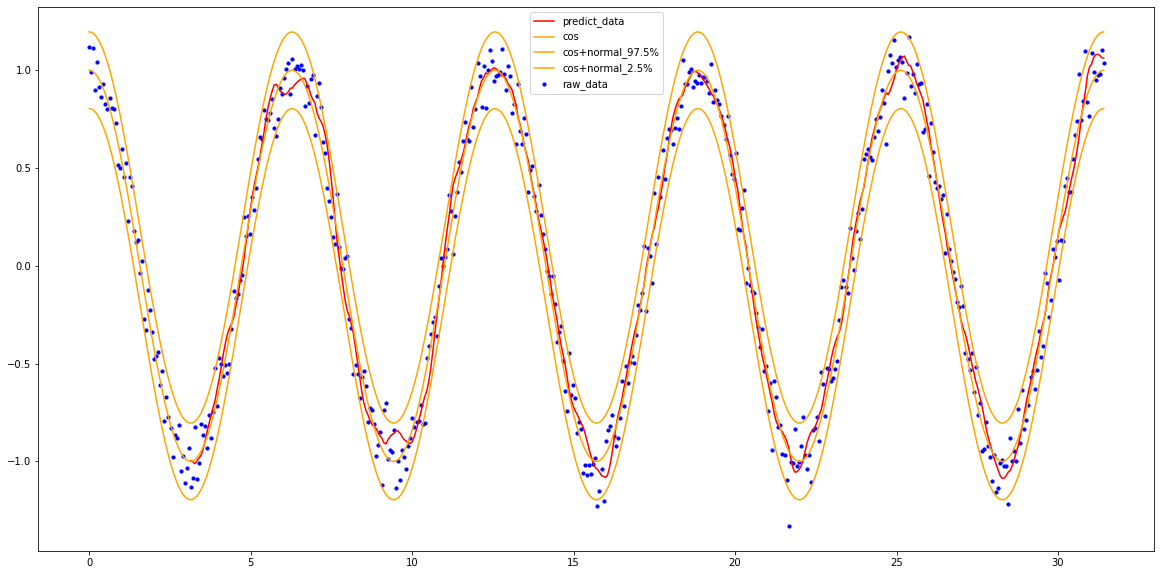

In [0]:
plt.figure(figsize=(20,10))
plt.plot(x[w:],predicted, color="r", label="predict_data")
plt.scatter(x, f, color="b", label="raw_data",s=10)
plt.plot(x,np.vectorize(np.cos)(x), color="orange", label="cos")
plt.plot(x,np.vectorize(np.cos)(x)+ampl*1.96*np.ones(len(x)),color="orange", label="cos+normal_97.5%")
plt.plot(x,np.vectorize(np.cos)(x)+ampl*(-1.96)*np.ones(len(x)),color="orange", label="cos+normal_2.5%")
plt.legend()
plt.show()